In [ ]:
# 回归与分类的本质区别：
# 回归：目标是一致的
# 分类：目标是离散的

In [82]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 为了能够使用而二维图像表现数据特征和数据标签的关系，所以假设样本集只有一个特征
x = np.linspace(0, 4, 30)
y = np.sin(x)

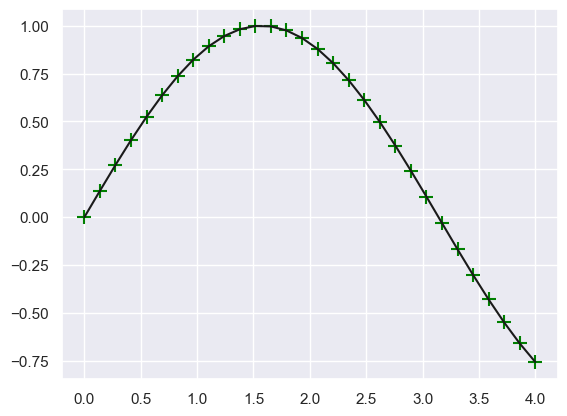

In [5]:
sns.set()
plt.plot(x, y, color="k")
plt.scatter(x, y, marker="+", color="green", s=100)

In [6]:
# 生成一组-0.2--0.2之间的浮点数
noise = np.random.random(30)*(0.4) - 0.2

In [7]:
y_ture = y + noise

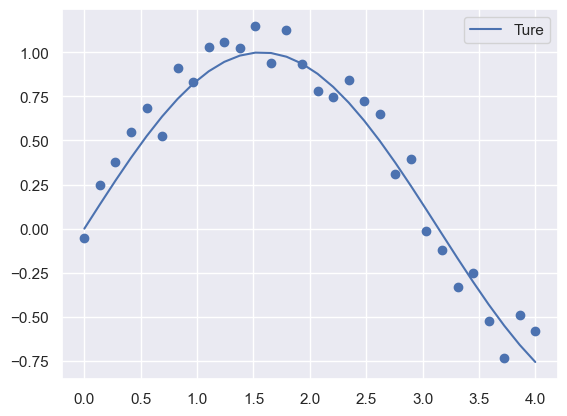

In [10]:
plt.scatter(x, y_ture)
# 如果没有噪声，数据真实的规律
plt.plot(x, y, label="Ture")
plt.legend() # 图例

In [11]:
# 一般衡量一个回归曲线的好坏，会使用“拟合度”来描述
# 过拟合：过度的关注样本点的局部特性
# 欠拟合：样本点的通用特性关注不足
# 最佳拟合：泛化能力最强   评价标准：比较两个模型之间的损失，损失越小，泛化能力最强

In [12]:
# 如果在训练集上评分很高，损失很小，测试集上刚好相反，过拟合的表现
# 如果在训练集和测试集上评分都很低，或损失都很大，欠拟合的表现
# 不论是过拟合还是欠拟合，泛化能力都不足。

In [13]:
samples = DataFrame(data={
    "X":x,
    "y":y_ture
})
samples

,X,y
0,0.000000,-0.055669
1,0.137931,0.246857
2,0.275862,0.378921
3,0.413793,0.549358
4,0.551724,0.686541
5,0.689655,0.527780
6,0.827586,0.910543
7,0.965517,0.831270
8,1.103448,1.031353
9,1.241379,1.058952


In [22]:
train = samples.X.copy()
target = samples.y.copy()

In [19]:
# KNeighborsClassifier：分类模型
# KNeighborsRegressor：回归模型
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor

In [20]:
knn = KNeighborsRegressor(n_neighbors=5)

In [23]:
train = train.values.reshape((-1,1))

In [24]:
knn.fit(train, target)

KNeighborsRegressor()

In [25]:
# 对训练集进行预测，拿到预测结果来绘制当前的回归曲线
y_ = knn.predict(train)

In [38]:
colors = sns.color_palette("husl")
colors

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.7350228985632719, 0.5952719904750953, 0.1944419133847522),
 (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.23299120924703914, 0.639586552066035, 0.9260706093977744),
 (0.9082572436765556, 0.40195790729656516, 0.9576909250290225)]

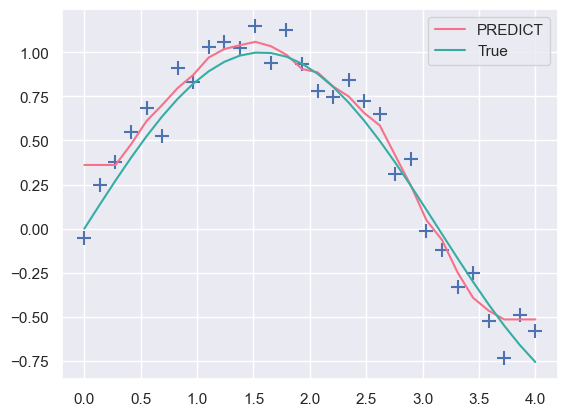

In [32]:
plt.plot(train, y_, label="PREDICT", color=colors[0])
plt.plot(train, y, label="True", color=colors[3])
plt.scatter(train, target, marker="+", s=100)
plt.legend()

In [33]:
# 训练集预测的结果，往往准确度或者是损失都比较好，不能直接作为模型的预测结果
# 测试集数据的预测结果更能说明问题
# 拆分样本集：评价模型

In [34]:
# 获取测试数据，原则是与训练数据不重复即可
# 另外要注意的是训练集的表结构和测试集的表结构是一致的
test = np.linspace(0,4,37).reshape((-1,1))
test

array([[0.        ],
       [0.11111111],
       [0.22222222],
       [0.33333333],
       [0.44444444],
       [0.55555556],
       [0.66666667],
       [0.77777778],
       [0.88888889],
       [1.        ],
       [1.11111111],
       [1.22222222],
       [1.33333333],
       [1.44444444],
       [1.55555556],
       [1.66666667],
       [1.77777778],
       [1.88888889],
       [2.        ],
       [2.11111111],
       [2.22222222],
       [2.33333333],
       [2.44444444],
       [2.55555556],
       [2.66666667],
       [2.77777778],
       [2.88888889],
       [3.        ],
       [3.11111111],
       [3.22222222],
       [3.33333333],
       [3.44444444],
       [3.55555556],
       [3.66666667],
       [3.77777778],
       [3.88888889],
       [4.        ]])

In [35]:
# 使用训练好的模型在对测试集进行预测
y1_ = knn.predict(test)

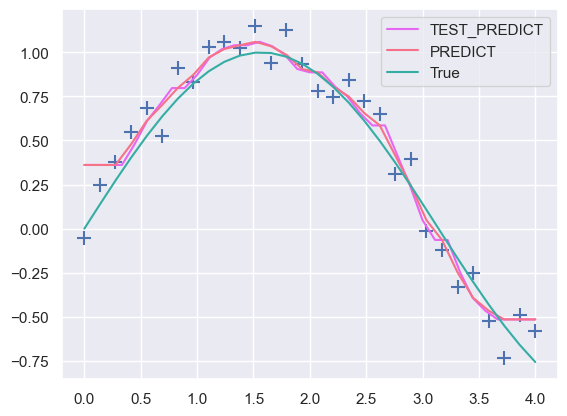

In [39]:
plt.plot(test,y1_,label="TEST_PREDICT",color=colors[5])
plt.plot(train, y_, label="PREDICT", color=colors[0])
plt.plot(train, y, label="True", color=colors[3])
plt.scatter(train, target, marker="+", s=100)
plt.legend()

In [40]:
# KNN回归模型如何评价
# 评价模型可以知道哪个模型更好，即是更具有泛化能力
# 使用MSE，均方误差，误差值越大越不好
# 残差直方图，0左右的数据越多越好，两侧的数据越少越好

In [56]:
# from sklearn.metrics import mean_absolute_error # 均值方差：均方误差

In [68]:
from sklearn.metrics import mean_absolute_error

In [83]:
from sklearn.datasets import load_boston # 房价数据
boston = load_boston()

In [58]:
data = boston.data
target = boston.target
feature_names = boston.feature_names

In [59]:
DataFrame(data=data,columns=feature_names)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [60]:
from sklearn.model_selection import train_test_split
# 正常的原则是我们要考虑样本集不能只拆分一次，这样的到的结果是不客观的
# 此处不考虑这个问题，做了简化，只拆分一次
X_train,X_test,y_train,y_test = train_test_split(data, target, test_size=0.2, random_state=1)

In [61]:
# 构造两个模型，通过评价来比较两个模型的好坏
model1 = KNeighborsRegressor(n_neighbors=3)
model2 = KNeighborsRegressor(n_neighbors=13)

In [62]:
# 训练
model1.fit(X_train,y_train)
model2.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=13)

In [71]:
# 训练集和测试集分别评价
def show_train_test_mse(model,X_train,X_test,y_train,y_test):    
    train_mes = mean_absolute_error(y_train,model.predict(X_train))
    test_mes = mean_absolute_error(y_test,model.predict(X_test))
    print("TRAIN:",train_mes)
    print("TEST:",test_mes)
    print("-----------------------")

In [72]:
# 查看model1的损失
show_train_test_mse(model1,X_train,X_test,y_train,y_test)
# 查看model2的损失
show_train_test_mse(model2,X_train,X_test,y_train,y_test)

TRAIN: 2.8467821782178215
TEST: 3.8898692810457516
-----------------------
TRAIN: 4.357044935262756
TEST: 4.874962292609351
-----------------------


In [73]:
# 使用「残差直方图」来表现两个模型的好坏

In [74]:
test_y1_ = model1.predict(X_test)
test_y2_ = model2.predict(X_test)

train_y1_ = model1.predict(X_train)
train_y2_ = model2.predict(X_train)

In [75]:
# 先看测试集的表现
loss1 = test_y1_ - y_test
loss2 = test_y2_ - y_test

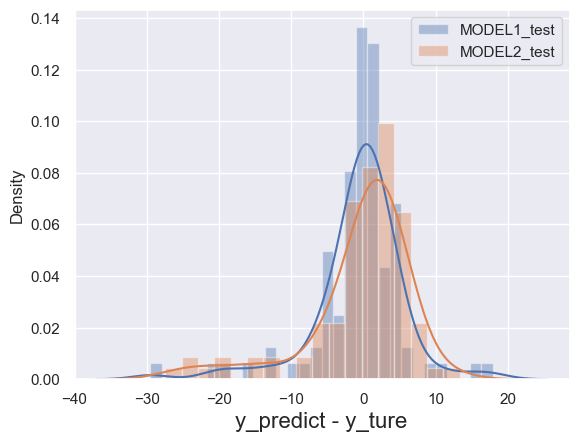

In [84]:
sns.distplot(loss1, label="MODEL1_test")
sns.distplot(loss2, label="MODEL2_test")
plt.xlabel("y_predict - y_ture", fontsize=16)
plt.legend()

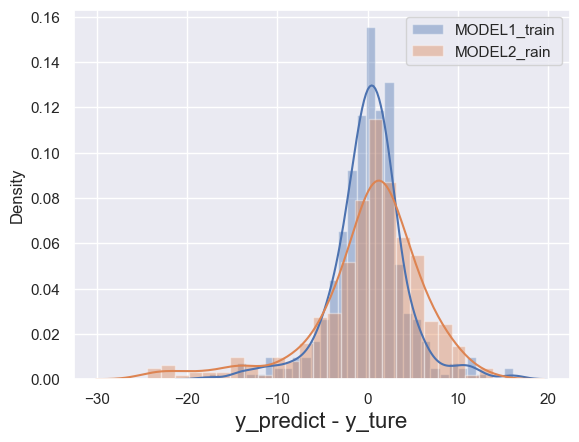

In [87]:
# 再看训练集的表现
loss11 = train_y1_ - y_train
loss22 = train_y2_ - y_train
sns.distplot(loss11, label="MODEL1_train")
sns.distplot(loss22, label="MODEL2_rain")
plt.xlabel("y_predict - y_ture", fontsize=16)
plt.legend()

In [88]:
# 现在来调参，寻找最优解
np.sqrt(data.shape[0]*0.8)

20.11964214393487

In [89]:
k_list = np.arange(1,25,step=4)
k_list

array([ 1,  5,  9, 13, 17, 21])

In [91]:
# 评价模型需要采用一种多次计算求平均值的方式
X_train,X_test,y_train,y_test = train_test_split(data, target, test_size=0.2, random_state=1)

In [94]:
train_err_list = []
test_err_list = []
for k in k_list:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    train_err = mean_absolute_error(y_train, model.predict(X_train))
    test_err = mean_absolute_error(y_test, model.predict(X_test))
    train_err_list.append(train_err)
    test_err_list.append(test_err)

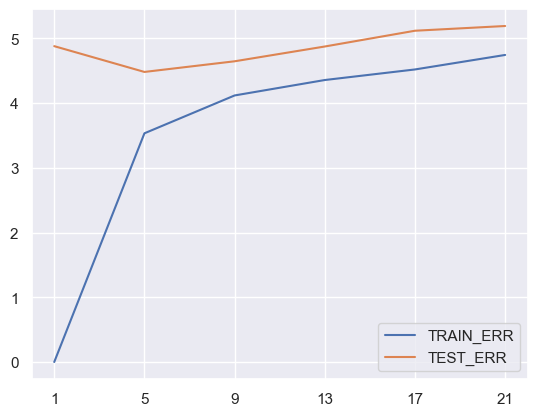

In [100]:
# 整合数据
result = DataFrame(data={
    "TRAIN_ERR":train_err_list,
    "TEST_ERR":test_err_list
}, index=k_list)
result.plot()
plt.xticks(k_list)
plt.show()

In [97]:
# 因为是回归模型，采用的是MSE的评价策略，所以值越大越说明算法损失大，所以选择参数的原则应该是误差越小越好，经验误差和泛化误差越接近越好

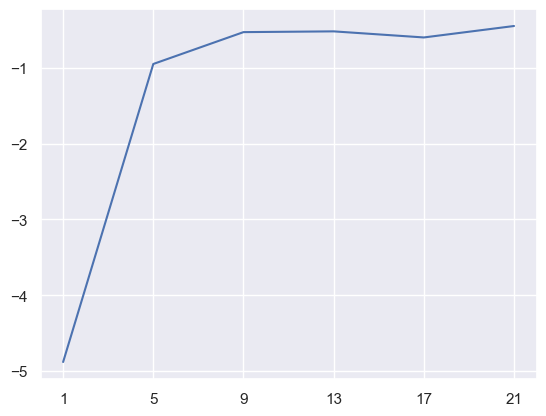

In [101]:
# 绘制经验误差和泛化误差的差的曲线
plt.plot(result.TRAIN_ERR - result.TEST_ERR)
plt.xticks(k_list)
plt.show()

In [102]:
# 最终结果，K=5时，经验误差和泛化误差都达到了最小值，并且两者的差距也是最小的

In [104]:
# 最好的模型
base_model = KNeighborsRegressor(n_neighbors=5)
base_model.fit(data, target)

KNeighborsRegressor()